In [1]:
import pandas as pd

train = pd.read_excel('../data/final_train.xlsx')
test = pd.read_excel('../data/final_test.xlsx')
oot = pd.read_excel('../data/final_oot.xlsx')

In [2]:
CRTOC_AG_NBJCRE_2T_IND_0009= {0:1, 1:0}
CRTOC_AG_LIGDEB_2T_IND_0015 = {0:1, 1:0} 
CRTOC_AG_MVTAFF_2T_IND_0010= {0:2, 1:1, 2:0} 
CRTOC_MOY_MVTAFF_IND_0010 = {0:2, 1:1, 2:0} 

train['CRTOC_AG_NBJCRE_2T_IND_0009'] = train['CRTOC_AG_NBJCRE_2T_IND_0009'].map(CRTOC_AG_NBJCRE_2T_IND_0009)
test['CRTOC_AG_NBJCRE_2T_IND_0009'] = test['CRTOC_AG_NBJCRE_2T_IND_0009'].map(CRTOC_AG_NBJCRE_2T_IND_0009)
oot['CRTOC_AG_NBJCRE_2T_IND_0009'] = oot['CRTOC_AG_NBJCRE_2T_IND_0009'].map(CRTOC_AG_NBJCRE_2T_IND_0009)

train['CRTOC_AG_LIGDEB_2T_IND_0015'] = train['CRTOC_AG_LIGDEB_2T_IND_0015'].map(CRTOC_AG_LIGDEB_2T_IND_0015)
test['CRTOC_AG_LIGDEB_2T_IND_0015'] = test['CRTOC_AG_LIGDEB_2T_IND_0015'].map(CRTOC_AG_LIGDEB_2T_IND_0015)
oot['CRTOC_AG_LIGDEB_2T_IND_0015'] = oot['CRTOC_AG_LIGDEB_2T_IND_0015'].map(CRTOC_AG_LIGDEB_2T_IND_0015)

train['CRTOC_AG_MVTAFF_2T_IND_0010'] = train['CRTOC_AG_MVTAFF_2T_IND_0010'].map(CRTOC_AG_MVTAFF_2T_IND_0010)
test['CRTOC_AG_MVTAFF_2T_IND_0010'] = test['CRTOC_AG_MVTAFF_2T_IND_0010'].map(CRTOC_AG_MVTAFF_2T_IND_0010)
oot['CRTOC_AG_MVTAFF_2T_IND_0010'] = oot['CRTOC_AG_MVTAFF_2T_IND_0010'].map(CRTOC_AG_MVTAFF_2T_IND_0010)

train['CRTOC_MOY_MVTAFF_IND_0010'] = train['CRTOC_MOY_MVTAFF_IND_0010'].map(CRTOC_MOY_MVTAFF_IND_0010)
test['CRTOC_MOY_MVTAFF_IND_0010'] = test['CRTOC_MOY_MVTAFF_IND_0010'].map(CRTOC_MOY_MVTAFF_IND_0010)
oot['CRTOC_MOY_MVTAFF_IND_0010'] = oot['CRTOC_MOY_MVTAFF_IND_0010'].map(CRTOC_MOY_MVTAFF_IND_0010)

In [3]:
# Pour chaque colonne catégorielle du DataFrame
for column in train.columns:
    if column != "DDefaut_NDB":
        print(f"Taux de défaut pour chaque classe de '{column}':")
        
        # Calculer le taux de défaut pour chaque classe de la variable catégorielle
        taux_defaut = train.groupby(column)['DDefaut_NDB'].mean()
        
        # Afficher le taux de défaut
        print(taux_defaut)
        print("\n")

Taux de défaut pour chaque classe de 'CRTOC_IND_0015':
CRTOC_IND_0015
0    0.022745
1    0.097493
2    0.494382
Name: DDefaut_NDB, dtype: float64


Taux de défaut pour chaque classe de 'CRTOC_AG_NBJCRE_2T_IND_0009':
CRTOC_AG_NBJCRE_2T_IND_0009
0    0.037697
1    0.350485
Name: DDefaut_NDB, dtype: float64


Taux de défaut pour chaque classe de 'CRTOC_AG_LIGDEB_2T_IND_0015':
CRTOC_AG_LIGDEB_2T_IND_0015
0    0.022641
1    0.227068
Name: DDefaut_NDB, dtype: float64


Taux de défaut pour chaque classe de 'CRTOC_AG_MVTAFF_2T_IND_0010':
CRTOC_AG_MVTAFF_2T_IND_0010
0    0.021304
1    0.055508
2    0.201160
Name: DDefaut_NDB, dtype: float64


Taux de défaut pour chaque classe de 'CRTOC_MOY_MVTAFF_IND_0010':
CRTOC_MOY_MVTAFF_IND_0010
0    0.022212
1    0.055098
2    0.142684
Name: DDefaut_NDB, dtype: float64




In [4]:
import statsmodels.api as sm

variables = train.columns.tolist()
variables.remove('DDefaut_NDB')

X_train = train[variables]
X_test = test[variables]
X_oot = oot[variables]

y_train = train['DDefaut_NDB']
y_test = test['DDefaut_NDB']
y_oot = oot['DDefaut_NDB']

# Convertir toutes les colonnes en type 'category'
X_train = X_train.apply(lambda col: col.astype('category'))
X_test = X_test.apply(lambda col: col.astype('category'))
X_oot = X_oot.apply(lambda col: col.astype('category'))

# Appliquer l'encodage One-Hot sur toutes les colonnes catégorielles
X_train_encoded = pd.get_dummies(X_train, drop_first=False)
X_test_encoded = pd.get_dummies(X_test, drop_first=False)
X_oot_encoded = pd.get_dummies(X_oot, drop_first=False)

# Convertir les colonnes booléennes en entiers (0/1)
X_train_encoded = X_train_encoded.astype(int)
X_test_encoded = X_test_encoded.astype(int)
X_oot_encoded = X_oot_encoded.astype(int)

# Afficher X_train_encoded après la suppression de la colonne
X_train_encoded


,CRTOC_IND_0015_0,CRTOC_IND_0015_1,CRTOC_IND_0015_2,CRTOC_AG_NBJCRE_2T_IND_0009_0,CRTOC_AG_NBJCRE_2T_IND_0009_1,CRTOC_AG_LIGDEB_2T_IND_0015_0,CRTOC_AG_LIGDEB_2T_IND_0015_1,CRTOC_AG_MVTAFF_2T_IND_0010_0,CRTOC_AG_MVTAFF_2T_IND_0010_1,CRTOC_AG_MVTAFF_2T_IND_0010_2,CRTOC_MOY_MVTAFF_IND_0010_0,CRTOC_MOY_MVTAFF_IND_0010_1,CRTOC_MOY_MVTAFF_IND_0010_2
0,1,0,0,1,0,1,0,1,0,0,1,0,0
1,1,0,0,1,0,1,0,0,1,0,1,0,0
2,1,0,0,1,0,1,0,0,1,0,1,0,0
3,1,0,0,1,0,1,0,1,0,0,1,0,0
4,1,0,0,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14713,1,0,0,1,0,1,0,0,0,1,0,0,1
14714,1,0,0,0,1,1,0,0,0,1,0,0,1
14715,1,0,0,1,0,1,0,1,0,0,1,0,0
14716,1,0,0,0,1,1,0,0,0,1,0,0,1


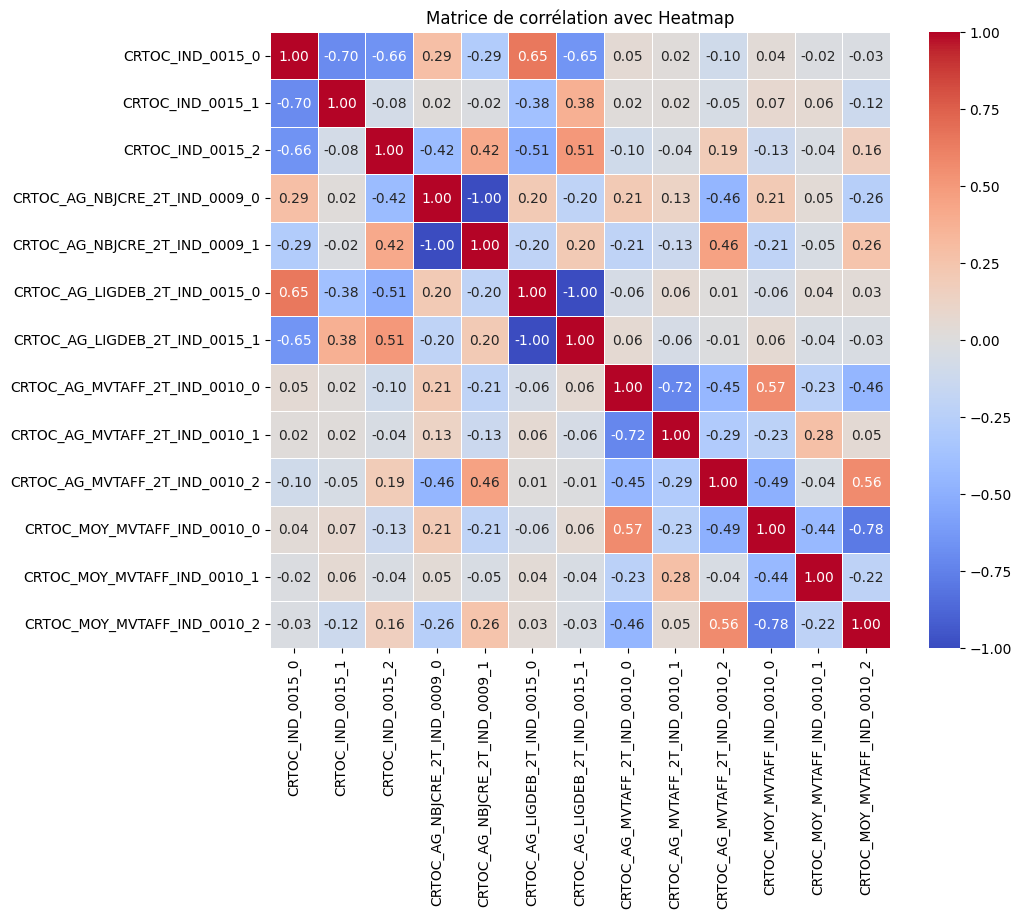

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = X_train_encoded.corr()

# Afficher la heatmap
plt.figure(figsize=(10, 8))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation avec Heatmap')
plt.show()


In [6]:
from sklearn.linear_model import LogisticRegression

def evaluate_model(X_train, X_test):
    """
    Parameters:
    -----------
    X_train : pandas.DataFrame
        Les variables explicatives pour l'ensemble d'entraînement.
    X_test : pandas.DataFrame
        Les variables explicatives pour l'ensemble de test.

    Returns:
    --------
    y_pred : numpy.ndarray
        Les prédictions de classes (0 ou 1) pour l'ensemble de test.
    """
    # Créer le modèle de régression logistique
    model = LogisticRegression()

    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)

    # Obtenez les noms des variables et les coefficients
    variables = X_train.columns
    coefficients = model.coef_.flatten()  # Assurez-vous que les coefficients sont en 1D

    # Affichage des résultats : Variable et son Coefficient
    for var, coef in zip(variables, coefficients):
        print(f"{var}: {coef:.3f}")

    print(f"Intercept: {round(model.intercept_[0], 3)}")

    # Prédire les classes pour X_test
    y_pred = model.predict(X_test)

    # Obtenir les probabilités pour la classe positive
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    return y_pred, y_pred_prob, model 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def plot_confusion_matrix(y_true, y_pred):
    """
    Affiche une matrice de confusion avec Seaborn.
    
    Parameters:
        y_true (array-like): Valeurs réelles des cibles.
        y_pred (array-like): Prédictions du modèle.
        labels (list, optional): Liste des étiquettes pour les classes (par défaut, déduites de y_true et y_pred).
    """
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_true, y_pred)

    # Extraire les valeurs de la matrice de confusion
    tn, fp, fn, tp = cm.ravel()

    # Calculer les métriques
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # Évite la division par zéro
    f1 = f1_score(y_true, y_pred)

    # Créer un heatmap Seaborn pour la matrice
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('Prédictions', fontsize=12)
    plt.ylabel('Réel', fontsize=12)
    plt.title('Matrice de Confusion', fontsize=14)
    plt.show()

    # Afficher les métriques
    print(f"Précision (Precision): {precision:.3f}")
    print(f"Rappel (Recall): {recall:.3f}")
    print(f"Taux de Faux Positifs (FPR): {fpr:.3f}")
    print(f"F1 score: {f1:.3f}")


In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_pred_prob):
    """
    Trace la courbe ROC et affiche l'AUC.
    
    Parameters:
        y_true (array-like): Les valeurs réelles des cibles (0 ou 1).
        y_pred_prob (array-like): Les probabilités prédites pour la classe positive.
    """
    # Calcul des métriques ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc_score = roc_auc_score(y_true, y_pred_prob)
    gini_score = (2*auc_score) - 1
    
    # Tracé de la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.3f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Model")
    
    # Ajout des labels et du titre
    plt.xlabel("False Positive Rate (FPR)", fontsize=12)
    plt.ylabel("True Positive Rate (TPR)", fontsize=12)
    plt.title("ROC Curve", fontsize=14)
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    print(f"AUC: {auc_score}")
    print(f"GINI: {gini_score}")

In [9]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_pr_curve(y_true, y_pred_prob):
    """
    Trace la courbe Precision-Recall pour un modèle.
    
    Parameters:
    -----------
    y_true : array-like
        Les vraies étiquettes (0 ou 1).
    y_pred_prob : array-like
        Les probabilités prédites pour la classe positive.
    """
    # Calculer précision, rappel et seuils
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    avg_precision = average_precision_score(y_true, y_pred_prob)
    
    # Tracer la courbe Precision-Recall
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"Courbe PR (AP = {avg_precision:.2f})", color="blue")
    plt.xlabel("Recall", fontsize=12)
    plt.ylabel("Precision", fontsize=12)
    plt.title("Courbe Precision-Recall", fontsize=14)
    plt.legend(loc="best")
    plt.grid(alpha=0.3)
    plt.show()

    print(f"AUC PR: {avg_precision}")

In [10]:
import numpy as np
from sklearn.metrics import log_loss

def calculate_aic_bic(model, X_train):
    """
    Fonction pour calculer l'AIC et le BIC du modèle de régression logistique.

    Parameters:
    -----------
    model : sklearn.linear_model.LogisticRegression
        Le modèle de régression logistique entraîné.
    X_train : pandas.DataFrame
        Les variables explicatives pour l'ensemble d'entraînement.

    Returns:
    --------
    aic : float
        Le critère d'information d'Akaike (AIC).
    bic : float
        Le critère d'information bayésien (BIC).
    """
    # Nombre d'observations
    n = len(y_train)
    
    # Nombre de paramètres du modèle
    k = X_train.shape[1] + 1  # Les coefficients plus l'intercept
    
    # Calcul des prédictions et du log loss
    y_pred_prob = model.predict_proba(X_train)[:, 1]
    log_likelihood = -log_loss(y_train, y_pred_prob) * n  # Log-vraisemblance
    
    # Calcul de l'AIC et du BIC
    aic = 2 * k - 2 * log_likelihood
    bic = np.log(n) * k - 2 * log_likelihood
    aic_bic = aic/bic
   
    # Affichage des résultats
    print(f"AIC/BIC: {aic_bic:.3f}")


CRTOC_IND_0015_0: -1.002
CRTOC_IND_0015_1: 0.018
CRTOC_IND_0015_2: 0.985
CRTOC_AG_NBJCRE_2T_IND_0009_0: -0.230
CRTOC_AG_NBJCRE_2T_IND_0009_1: 0.230
CRTOC_AG_LIGDEB_2T_IND_0015_0: -0.888
CRTOC_AG_LIGDEB_2T_IND_0015_1: 0.888
CRTOC_AG_MVTAFF_2T_IND_0010_0: -0.728
CRTOC_AG_MVTAFF_2T_IND_0010_1: 0.010
CRTOC_AG_MVTAFF_2T_IND_0010_2: 0.719
CRTOC_MOY_MVTAFF_IND_0010_0: -0.685
CRTOC_MOY_MVTAFF_IND_0010_1: 0.054
CRTOC_MOY_MVTAFF_IND_0010_2: 0.632
Intercept: -1.871


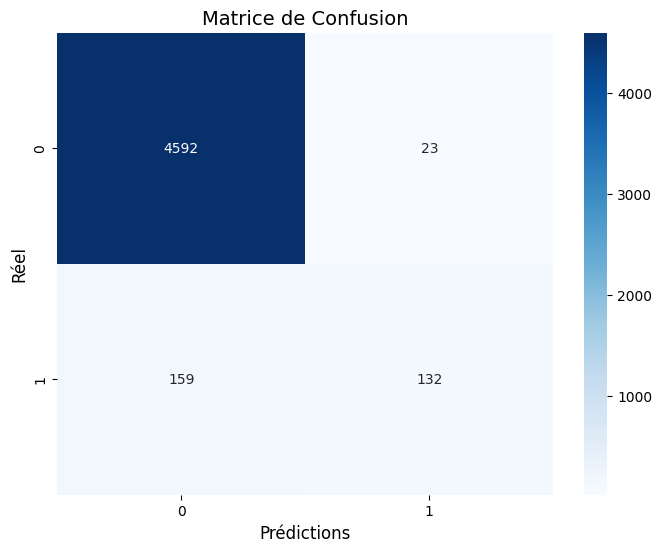

Précision (Precision): 0.852
Rappel (Recall): 0.454
Taux de Faux Positifs (FPR): 0.005
F1 score: 0.592


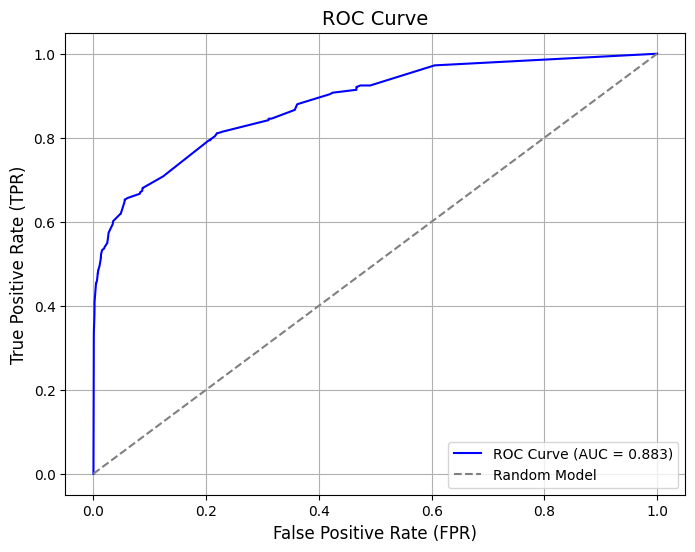

AUC: 0.8833491565305127
GINI: 0.7666983130610254


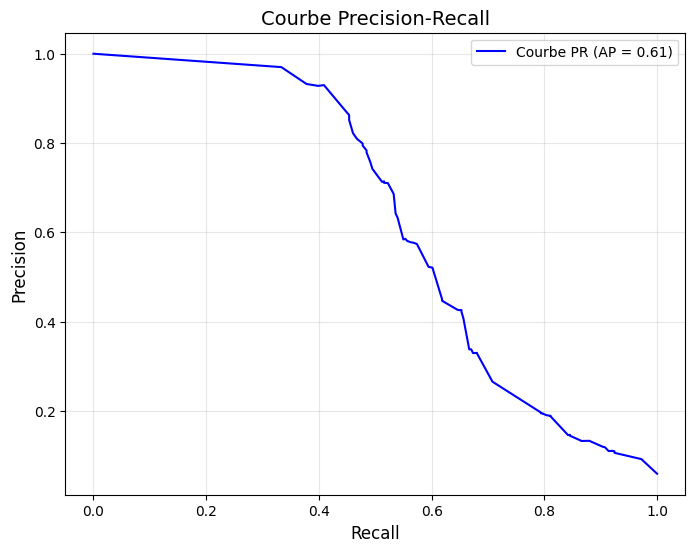

AUC PR: 0.6105493439546332
AIC/BIC: 0.975


In [11]:
# Évaluer le modèle
y_pred, y_pred_prob, model = evaluate_model(X_train=X_train_encoded, X_test=X_test_encoded)

# Tracer la matrice de confusion
plot_confusion_matrix(y_test, y_pred)

# Tracer la courbe ROC
plot_roc_curve(y_test, y_pred_prob)

# Tracer la courbe PR
plot_pr_curve(y_test, y_pred_prob)

 # Calculer l'AIC et le BIC
calculate_aic_bic(model, X_train=X_train_encoded)